In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

#Load the dataset

In [2]:
iris_data = pd.read_csv('/content/iris.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


#Data Exploration and Preprocessing

In [3]:
print("\nDataset Information:")
iris_data.info()
print("\nSummary Statistics:")
display(iris_data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


#Encoding categorical labels if necessary

In [5]:
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Feature-target split

In [6]:
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

#Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the ANN-SLP model

In [9]:
model = MLPClassifier(hidden_layer_sizes=(), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(), max_iter=500, random_state=42)

# Model evaluation

In [10]:
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94         9
           3       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# Visualizing the Confusion Matrix

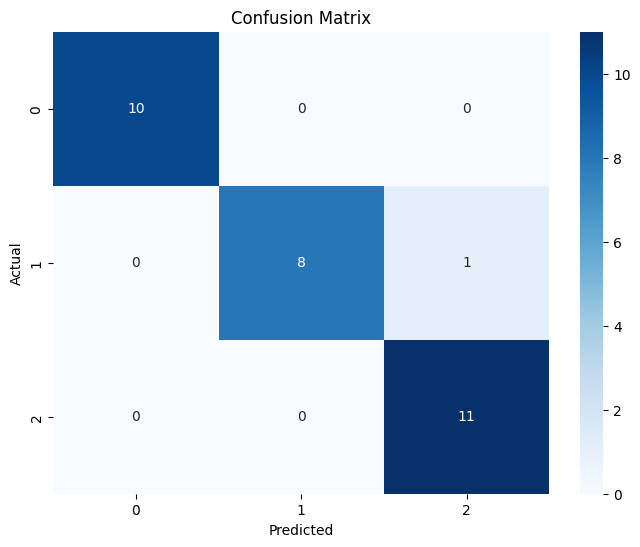

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
